## Singular Value Decomposition
---
**Elo notes**


In linear algebra, the singular value decomposition (SVD) is a factorization of a real or complex matrix. It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any $m × n$ matrix via an extension of polar decomposition. It has many useful applications in signal processing and statistics.

**  SVD is a technique for both improving the quality of a recommendation as well as handling sparse data is matrix factorization.**

#### Latent variable - Latent feature

In statistics, latent variables (from Latin: present participle of lateo (“lie hidden”), as opposed to observable variables), are variables that are not directly observed but are rather inferred (through a mathematical model) from other variables that are observed (directly measured). Mathematical models that aim to explain observed variables in terms of latent variables are called latent variable models. 

Sometimes latent variables correspond to aspects of physical reality, which could in principle be measured, but may not be for practical reasons. In this situation, the term hidden variables is commonly used (reflecting the fact that the variables are "really there", but hidden). Other times, latent variables correspond to abstract concepts, like categories, behavioral or mental states, or data structures. The terms hypothetical variables or hypothetical constructs may be used in these situations.

One advantage of using latent variables is that it reduces the dimensionality of data. A large number of observable variables can be aggregated in a model to represent an underlying concept, making it easier to understand the data. In this sense, they serve a function similar to that of scientific theories. At the same time, latent variables link observable ("sub-symbolic") data in the real world to symbolic data in the modeled world.

Latent variables, as created by factor analytic methods, generally represent "shared" variance, or the degree to which variables "move" together. Variables that have no correlation cannot result in a latent construct based on the common factor model.

#### Singular value decomposition

The principal components transformation can also be associated with another matrix factorization, the singular value decomposition $(SVD)$ of $X$,

${\displaystyle \mathbf {X} =\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}} $

Here $Σ$ is an n-by-p rectangular diagonal matrix of positive numbers $σ(k)$, called the singular values of $X$; $U$ is an n-by-n matrix, the columns of which are orthogonal unit vectors of length n called the left singular vectors of $X$; and W is a p-by-p whose columns are orthogonal unit vectors of length p and called the right singular vectors of $X$.

In terms of this factorization, the matrix $X^T X$ can be written

${\displaystyle {\begin{aligned}\mathbf {X} ^{T}\mathbf {X} &=\mathbf {W} \mathbf {\Sigma } \mathbf {U} ^{T}\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}\\&=\mathbf {W} \mathbf {\Sigma } ^{2}\mathbf {W} ^{T}\end{aligned}}} $

Comparison with the eigenvector factorization of $X^T X$ establishes that the right singular vectors $W$ of $X$ are equivalent to the eigenvectors of $X^T X$, while the singular values $σ(k)$ of $Σ$ are equal to the square roots of the eigenvalues $λ(k)$ of $X^TX$.

Using the singular value decomposition the score matrix T can be written

${\displaystyle {\begin{aligned}\mathbf {T} &=\mathbf {X} \mathbf {W} \\&=\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}\mathbf {W} \\&=\mathbf {U} \mathbf {\Sigma } \end{aligned}}} $

so each column of $T$ is given by one of the left singular vectors of $X$ multiplied by the corresponding singular value. This form is also the polar decomposition of $T$.

Efficient algorithms exist to calculate the $SVD$ of $X$ without having to form the matrix $X^TX$, so computing the $SVD$ is now the standard way to calculate a principal components analysis from a data matrix[citation needed], unless only a handful of components are required.

As with the eigen-decomposition, a truncated $n × L$ score matrix $TL$ can be obtained by considering only the first L largest singular values and their singular vectors:

${\displaystyle \mathbf {T} _{L}=\mathbf {U} _{L}\mathbf {\Sigma } _{L}=\mathbf {X} \mathbf {W} _{L}}$

The truncation of a matrix $M$ or $T$ using a truncated singular value decomposition in this way produces a truncated matrix that is the nearest possible matrix of rank L to the original matrix, in the sense of the difference between the two having the smallest possible Frobenius norm, a result known as the Eckart–Young theorem [1936].

In [63]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.spatial import distance

from sklearn import cluster, datasets, decomposition
from sklearn import random_projection, preprocessing
from sklearn import ensemble, lda, manifold
from sklearn.manifold import MDS

from statsmodels.iolib.foreign import genfromdta


from numpy.linalg import svd

import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sea
sea.set()

%matplotlib inline

### SVD - Project 1
#### The International Standard Book Number (ISBN) is a 13-digit number that uniquely identifies books and book-like products published internationally.

#### df :  Ratings : Reviews : Book Ratings

In [26]:
df = pd.read_csv('data/book_reviews.csv', index_col=0)

In [27]:
df[:2]

,User-ID,ISBN,Book-Rating
1083,277195,0060391626,10
1084,277195,0060502258,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220995 entries, 1083 to 1149746
Data columns (total 3 columns):
User-ID        220995 non-null int64
ISBN           220995 non-null object
Book-Rating    220995 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.7+ MB


In [29]:
#df.describe()

In [30]:
df['Book-Rating'] = df['Book-Rating'].replace(0, -1)

In [31]:
df['User-ID'].isnull().sum()

0

In [32]:
df[:2]

,User-ID,ISBN,Book-Rating
1083,277195,0060391626,10
1084,277195,0060502258,-1


In [33]:
df.shape

(220995, 3)

---
### Feature Matrix

Rows : Users - Subjects

Columns : Features - User's review of the ISBN book

Mising Data : -1

In [34]:
mainmatrix = df.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(-1)

In [35]:
mainmatrix[:2]

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
254,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [36]:
# International Standard Book Number : ISBN : feature names
feature_names = mainmatrix.columns

In [37]:
mainmatrix.shape

(2500, 6092)

---
### Matrix Factorization
#### SVD - Singular Value Decomposition on mainmatrix (feature matrix)

Let us define:

$k$ : Number of Latent Features (Rank of our matrix)

$k$ is the rank of the dataframe - **In the Upper bound on the number of latent features**



0 < Lower dimensional space < $k$   :  Extracting the $k$ features that represent the 90% of the variance per the pareto chart. 

** Decomposing our MainMatrix $A_k$ (__m__ x __n__)  into 3 component matrices **


$k$ - Lower dimensional space / Projecting into a lower dimesional space


* __m__: # of users
* __n__: # of items
* __k__: # of latent features (also rank of the __df__)

__A__$_k$ = $U_k$  $S_k$  $V_k^T$

Where:

$U_k$ : Users

$S_k$ : Sigma - **eigenvalues** - Singular Values (Topics / Theme Space / Concepts)

$V_k^T$ : Feature Item

---

__$A_k$__ is our feature-matrix: user-book rating matrix (__m__ x __n__)

- **U** is our __weights__ matrix (__m__ x __k__) --> __User to topic matrix__
- **S** is our __singular values__ matrix (__k__ x __k__) --> __eigenvalues/latent features (Topics)__
- and **V*** is our __features__ matrix (__k__ x __n__) --> item (book) __feature to topic__

The larger the singular value (**S** matrix), the more important that latent feature.  

Since **U** and **V** are orthogonal to each other, we can rearrange them in order of **decreasing singular values.  If we want to reduce the dimension, we simply set a threshold for which columns/rows to cut off (low rank approximation):

You can think of the weights matrix **U** as representing how much of each latent feature corresponds to each user, and the features matrix **V** as how much of each item/rating contributes to the latent features.

```
u, sigma, v_t = svd(mainmatrix.values, full_matrices=False)
```

In [46]:
u, sigma, v_t  =  svd(mainmatrix.as_matrix())

In [29]:
u.shape

(2500, 2500)

In [30]:
sigma.shape

(2500,)

In [31]:
v_t.shape

(2500, 6092)

### Reducing dimension  

The Eigenvalues - Lambdas(Sigma values) are the variance in each of these dimensions.

If we would like to reduce the number of dimensions, we just select the lambdas with the more variance and remove the smalest of the lambdas (sigma values).

**Energy** -  The square root of the eigenvalues sigma

Energy is the same as variance of a dimension and we can compute it simply by squaring the singular values.


In [32]:
# energy is the sum of the energy of each singular value
energy = sigma**2
energy

array([  1.41978492e+07,   1.10486529e+05,   4.93216571e+04, ...,
         6.28154377e-29,   5.73961999e-29,   5.64705620e-29])

#### Ploting Lambda - Eigenvalues

(0, 20000)

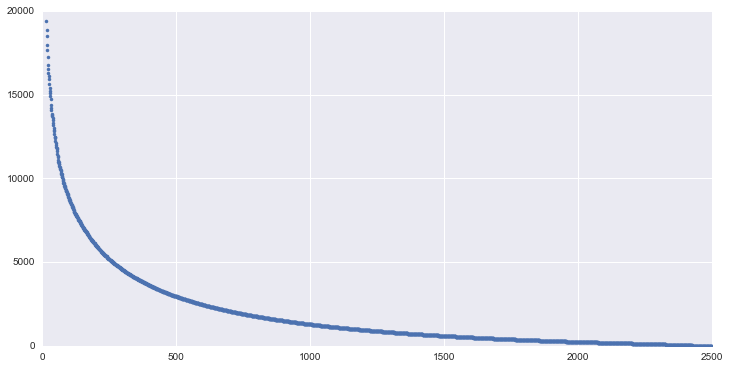

In [34]:
plt.figure(figsize= (12, 6))
plt.plot(energy, '.')
plt.ylim(0, 20000)

Rank of the array is the number of SVD singular values of the array that are greater than tol parameter

In [35]:
np.linalg.matrix_rank(mainmatrix)

2440

### Reducing features


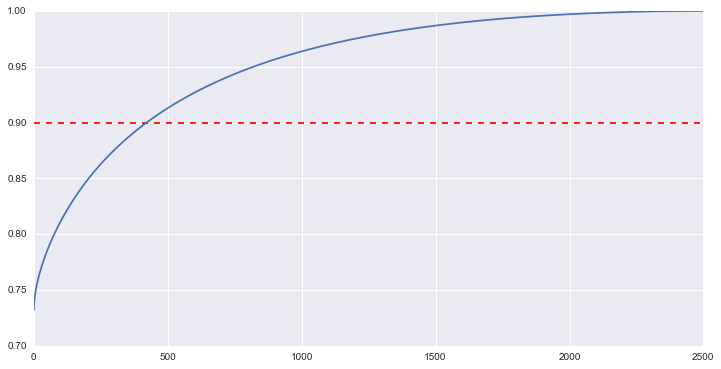

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(energy)/sum(energy))
plt.hlines(0.9, *plt.gca().get_xlim(), linestyle='dashed', color='red');


In [37]:
features_variance = np.cumsum(energy)/sum(energy)

In [38]:
reduction = features_variance > 0.9

In [39]:
reduction = 2500 - np.sum(features_variance > 0.9)
reduction

421

In [40]:
np.argmax(np.cumsum(energy) >= power*.9)

421

90% of the variance $\sigma^2$ is contained in 421 features, 441 concepts accounts for 90% of the energy.

422 - adjusting for error

In [41]:
sum((sigma**2)[:422])/sum((sigma**2))

0.90005748473458003

#### Concept, Topic space

- Feature matrix / mainmatrix : (__m__ x __n__)


- $U$ rows connects Users to Concepts (__m__ x __k__)


- $V^T$ rows connects Features (Books) to Concept (__k__ x __n__)

$U$ and $V^T$ are ortogonal matrices 

#### Selecting 10 topics

$U$ and $V^T$ are ortogonal matrices 

```
V_10 = VT[:10,:]   # Rows

U_10 = U[:,:10]    # Columns
```

In [42]:
u.shape

(2500, 2500)

In [43]:
mainmatrix.shape

(2500, 6092)

In [44]:
v_t.shape

(2500, 6092)

### SVD
#### K = 450
#### Let's keep 450 books for the ~90% of the total energy

In [113]:
print u[:, :450].shape
u[:, :450]

(2500, 450)


array([[ -2.03009199e-02,   1.46995600e-03,  -5.51468665e-03, ...,
         -7.88916551e-03,   2.60467464e-02,   1.42720241e-02],
       [ -2.00591181e-02,   3.41022036e-03,  -4.42233141e-03, ...,
          1.56383075e-03,  -2.62887225e-02,   1.64118668e-02],
       [ -2.01392464e-02,  -2.41072849e-03,  -2.25175391e-04, ...,
         -1.87033543e-02,   3.73306251e-02,  -2.67488883e-02],
       ..., 
       [ -2.02847751e-02,  -1.89776666e-03,   4.08550795e-03, ...,
          6.90450059e-03,   9.96425482e-03,  -3.97038796e-03],
       [ -2.00238756e-02,   1.86895879e-03,  -5.94084427e-03, ...,
          1.73168086e-02,   3.16512793e-02,  -1.98812019e-02],
       [ -2.03539484e-02,   1.44039262e-03,  -7.90382567e-05, ...,
         -1.52153672e-02,   1.96520703e-03,  -1.65535344e-03]])

In [115]:
print v_t[:450, :].shape
v_t[:450, :]

(450, 6092)


array([[ 0.0130985 ,  0.01284511,  0.01323676, ...,  0.01323676,
         0.01323676,  0.01323676],
       [-0.00928497,  0.01717979, -0.00928893, ..., -0.00928893,
        -0.00928893, -0.00928893],
       [-0.00297272, -0.00468291, -0.00273579, ..., -0.00273579,
        -0.00273579, -0.00273579],
       ..., 
       [ 0.00015091,  0.02218852,  0.00015301, ...,  0.00015301,
         0.00015301,  0.00015301],
       [ 0.01013115,  0.00474572,  0.00021316, ...,  0.00021316,
         0.00021316,  0.00021316],
       [-0.00165844,  0.00646045,  0.00027946, ...,  0.00027946,
         0.00027946,  0.00027946]])

---
### Top Books by Concept / Topic -  Features to Concepts /  Topics
#### Obtaining:

$V^T$ column/feature index

#### Selecting Concept / Topic number : 

Concept number : 0
#### Selecting and sorting the first row : 

Concept 0  :  Sort to obtain how much of each item/rating(columns from feature matrix/mainmatrix) contributes to the latent features.

```
[-5:] # Selecting top 5 items

[::-1] # Descending order : mayor to lower to obtain the mayor contributors to the latent features```

In [73]:
# with v_t[0]row obtain the columns index from the top 5 items

concept_0 = v_t[0].argsort()[-5:][::-1]
concept_0

array([5961, 6034, 6087, 6070, 6029])



#### Apply Top features: $V^T$ column index to the column Feature matrix / mainmatrix in order to obtain the Top Ratings from the Features

Top n : Top items from:

- Feature matrix / mainmatrix : (__m__ x __n__)

```From v_t column index now I select the columns from main matrix that are most related to the concept 0```

In [71]:
mainmatrix.columns[concept_0]

Index([u'1841721522', u'3423105518', u'8807813025', u'3548603203',
       u'3379015180'],
      dtype='object', name=u'ISBN')

In [54]:
data = pd.read_csv('data/book_meta.csv', sep=";", error_bad_lines=False, low_memory=False
                       ).drop(['two', 'three'], axis=1)

In [55]:
data[:2]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
ISBN                   271379 non-null object
Book-Title             271379 non-null object
Book-Author            271379 non-null object
Year-Of-Publication    271379 non-null object
Publisher              271377 non-null object
Image-URL-S            271379 non-null object
Image-URL-M            271379 non-null object
Image-URL-L            271376 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


#### BOOKS 

- Books Index and Title

In [58]:
book_names = data.set_index('ISBN')['Book-Title']
book_names[:4]

ISBN
0195153448                                  Classical Mythology
0002005018                                         Clara Callan
0060973129                                 Decision in Normandy
0374157065    Flu: The Story of the Great Influenza Pandemic...
Name: Book-Title, dtype: object

In [72]:
book_names['0195153448']

'Classical Mythology'

#### Connecting  Features (Books) to Concepts (Topics) = 0
- $V^T$[0] row obtain the columns that connects Concept to Features(Books) (__k__ x __n__)
#### book_names :  Index 'ISBN'  >>   ['Book-Title']
- mainmatrix : (__m__ x __n__)

* __m__: # of User-ID
* __n__: # of ISBN

- *__Top ISBN by User__*: Top Rating by User:  mainmatrix.columns[topconcept_index]

In [ ]:
# with v_t[0]row obtain the columns index from the top 5 items(Features / Books)

concept_0 = v_t[0].argsort()[-5:][::-1]
concept_0

In [100]:
v_t[0].argsort()[-10:][::-1]

array([5961, 6034, 6087, 6070, 6029, 6020, 2298, 6088, 6021, 6027])

In [93]:
# In descending order : mayor to lower
toplatent_features_index = v_t[0].argsort()[::-1][10:]


10


array([5961, 6034, 6087, 6070, 6029, 6020, 2298, 6088, 6021, 6027])

In [94]:
mainmatrix.columns[toplatent_features_index]

Index([u'1841721522', u'3423105518', u'8807813025', u'3548603203',
       u'3379015180', u'3250600555', u'042516019X', u'8817106100',
       u'3257061269', u'3257229364'],
      dtype='object', name=u'ISBN')

In [95]:
# For Concept 0 we have the top 10 books
latent_features_index = mainmatrix.columns[toplatent_features_index]
book_names[latent_features_index]

ISBN
1841721522    New Vegetarian: Bold and Beautiful Recipes for...
3423105518                                        Name Der Rose
8807813025                               Novocento, Un Monologo
3548603203                                        Artemis Fowl.
3379015180                                      Schlafes Bruder
3250600555    Monsieur Ibrahim und die Blumen des Koran. Erz...
042516019X                                           Masquerade
8817106100                                          Oceano Mare
3257061269                                       Der Alchimist.
3257229364    Endstation Venedig. Commissario Brunettis zwei...
Name: Book-Title, dtype: object

In [96]:
def top_books_by_topic(mainmatrix, v_t, concept=None, booklist_qty=None):
    top_latent_features_index = v_t[concept].argsort()[-booklist_qty:][::-1]
    latent_features_index = mainmatrix.columns[top_latent_features_index]
    return book_names[latent_features_index]

In [125]:
#  450 concepts(topics) accounts for 90% of the energy(Variance)
# concepts = 450
concepts = 3
for i in range(concepts):
    print 'Concept: {}'.format(i)
    print top_books_by_topic(mainmatrix, v_t, i, 5)
    print ''

Concept: 0
ISBN
1841721522    New Vegetarian: Bold and Beautiful Recipes for...
3423105518                                        Name Der Rose
8807813025                               Novocento, Un Monologo
3548603203                                        Artemis Fowl.
3379015180                                      Schlafes Bruder
Name: Book-Title, dtype: object

Concept: 1
ISBN
0312195516                  The Red Tent (Bestselling Backlist)
0385504209                                    The Da Vinci Code
0446672211    Where the Heart Is (Oprah's Book Club (Paperba...
0316666343                            The Lovely Bones: A Novel
0671001795                                    Two for the Dough
Name: Book-Title, dtype: object

Concept: 2
ISBN
0515131229    Dance upon the Air (Three Sisters Island Trilogy)
051513287X         Face the Fire (Three Sisters Island Trilogy)
051513628X               Key of Light (Key Trilogy (Paperback))
0515128554                     Heart of the Sea (Irish

#### Inference

Concept / Topic 0 : Mistery novel

Concept / Topic 1 : Fantasy


.

.

.

Concept / Topic 450  : ....just for fun. 

---
### User to Concept / Topic
#### Getting recomendation by users

In [165]:
u.shape

(2500, 2500)

In [101]:
u[0, :]

array([ -2.03009199e-02,   1.46995600e-03,  -5.51468665e-03, ...,
        -1.67609021e-17,   7.82778923e-18,  -8.91833199e-18])

In [102]:
u[0]

array([ -2.03009199e-02,   1.46995600e-03,  -5.51468665e-03, ...,
        -1.67609021e-17,   7.82778923e-18,  -8.91833199e-18])

In [118]:
user0_top_topics = u[0].argsort()[::-1][:10]
user0_top_topics

array([2112, 2000, 2101, 2120, 1987, 2260, 2182, 1901, 1939, 1842])

In [122]:
for topic in user0_top_topics:
    print 'User_0 - Top Books by Top Concept/Topic: {} '.format(topic)
    print top_books_by_topic(mainmatrix, v_t, topic, 5)
    print ''

User_0 - Top Books by Top Concept/Topic: 2112 
ISBN
0151001006              Snow Falling on Cedars
0441003389                   Freedom's Landing
0140440410    Anna Karenina (Penguin Classics)
0553580388                         The Patient
3423105410                                 NaN
Name: Book-Title, dtype: object

User_0 - Top Books by Top Concept/Topic: 2000 
ISBN
0446603104                                  Seduction by Design
0670853097                                    The Stone Diaries
0553212451                         The Jungle (Bantam Classics)
0425108937                                Flight of the Old Dog
0375712925    The Emperor of Ocean Park (Vintage Contemporar...
Name: Book-Title, dtype: object

User_0 - Top Books by Top Concept/Topic: 2101 
ISBN
0671510126      The Good Earth (Enriched Classics)
0590477404    Monster Blood II (Goosebumps, No 18)
0374281602              Reversible Errors: A Novel
0515128821                             The Breaker
0765341972         

- According to the book recommendation user0 might be  ....

In [166]:
u_reduced = u[:, :450]
sigma_reduced = sigma[:450]
v_t_reduced = v_t[:450]

In [170]:
matrix_recontruction = (u_reduced*sigma_reduced).dot(v_t_reduced)
matrix_recontruction

array([[-0.95744986, -1.10020907, -1.0012361 , ..., -1.0012361 ,
        -1.0012361 , -1.0012361 ],
       [-1.14121559, -1.18631704, -1.0228987 , ..., -1.0228987 ,
        -1.0228987 , -1.0228987 ],
       [-0.99645468, -0.85329675, -0.99015955, ..., -0.99015955,
        -0.99015955, -0.99015955],
       ..., 
       [-0.97749502, -0.93852378, -1.00563909, ..., -1.00563909,
        -1.00563909, -1.00563909],
       [-0.7848654 , -1.0411863 , -0.98659292, ..., -0.98659292,
        -0.98659292, -0.98659292],
       [-1.07210139, -0.82444039, -1.01193158, ..., -1.01193158,
        -1.01193158, -1.01193158]])

---
### SVD - Project 2
#### User Movie Rating


df_movies : Reviews

In [5]:
df_movies = pd.read_table('data/data/u.data', sep='\t', names=['user', 'movie', 'rating', 'timestamp'])
df_movies[:4]

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923


In [6]:
features = df_movies.pivot(index='user', columns='movie', values='rating').fillna(-1)
features[:4]

movie,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [7]:
features.shape

(943, 1682)

In [8]:
# Feature # 1 info
features[[1]].describe()

movie,1
count,943.000000
mean,1.338282
std,2.521476
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,4.000000
max,5.000000


---
### Matrix Factorization
#### SVD - Singular Value Decomposition on mainmatrix (feature matrix)

Let us define:

$k$ : Number of Latent Features (Rank of our matrix)

$k$ is the rank of the dataframe - **In the Upper bound on the number of latent features**



0 < Lower dimensional space < $k$   :  Extracting the $k$ features that represent the 90% of the variance per the pareto chart. 

** Decomposing our MainMatrix $A_k$ (__m__ x __n__)  into 3 component matrices **


$k$ - Lower dimensional space / Projecting into a lower dimesional space


* __m__: # of users
* __n__: # of items
* __k__: # of latent features (also rank of the __df__)

__A__$_k$ = $U_k$  $S_k$  $V_k^T$

Where:

$U_k$ : Users

$S_k$ : Sigma - **eigenvalues** - Singular Values (Topics / Theme Space / Concepts)

$V_k^T$ : Feature Item

---

__$A_k$__ is our feature-matrix: user-book rating matrix (__m__ x __n__)

- **U** is our __weights__ matrix (__m__ x __k__) --> __User to topic matrix__
- **S** is our __singular values__ matrix (__k__ x __k__) --> __eigenvalues/latent features (Topics)__
- and **V*** is our __features__ matrix (__k__ x __n__) --> item (book) __feature to topic__

The larger the singular value (**S** matrix), the more important that latent feature.  

Since **U** and **V** are orthogonal to each other, we can rearrange them in order of **decreasing singular values.  If we want to reduce the dimension, we simply set a threshold for which columns/rows to cut off (low rank approximation):

You can think of the weights matrix **U** as representing how much of each latent feature corresponds to each user, and the features matrix **V** as how much of each item/rating contributes to the latent features.

In [12]:
U_, S, VT =  svd(features.as_matrix())

#### Energy - Singular values are square roots of eigenvalues

Energy is the same as variance of a dimension and we can compute it simply by squaring the singular values.

singular values are square roots of eigenvalues

(0, 20000)

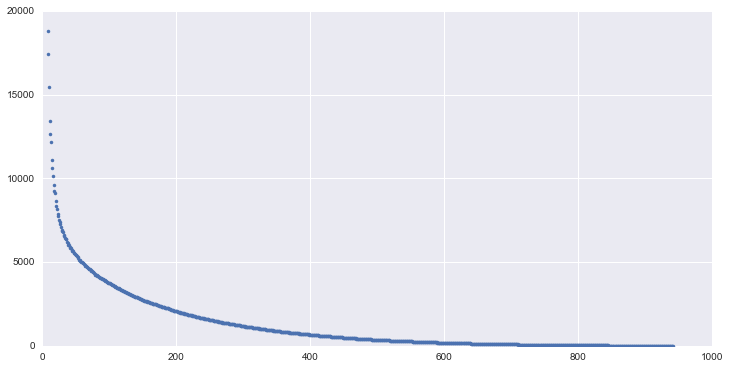

In [13]:
energy_ = S**2
power_ = np.sum(S**2)
plt.figure(figsize=(12, 6))
plt.plot(energy_, '.')
plt.ylim(0, 20000)

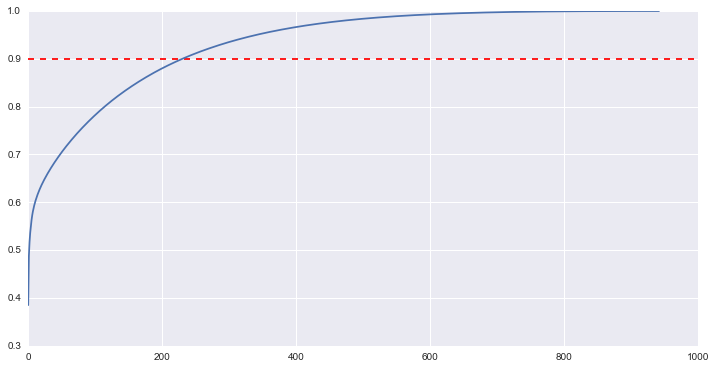

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(energy_)/sum(energy_))
plt.hlines(0.9, *plt.gca().get_xlim(), linestyle='dashed', color='red');

In [15]:
feature_variance = np.cumsum(energy_)/sum(energy_)
#feature_variance
threshold_90variance = np.argmax(np.cumsum(energy_) >= power_*0.9)
threshold_90variance

231

In [16]:
sum((S**2)[:232])/sum((S**2))

0.90054744325451064

## Concep, Topic space

- mainmatrix : (__m__ x __n__)


- $U$ rows connects Users to Concepts(Topics) (__m__ x __k__)


- $V^T$ rows connects Concept to Movies (__k__ x __n__)

$U$ and $V^T$ are ortogonal matrices 

## keep 10 topics

$U$ and $V^T$ are ortogonal matrices 

```
v10 = VT[:10,:]   # Rows

u10 = U_[:,:10]    # Columns
```

In [17]:
v10 = VT[:10, :]

In [18]:
u10 = U_[:, :10]

### Concepts /  Topics
#### Obtaining $V^T$ column index
#### Selecting Concept (Topic) 

Concept number : 0
#### Selecting and Sorting the first row : 
```
Concept 0  =  Sort to obtain how much of each item/rating(column from mainmatrix) contributes to the latent features.

[-5:] # Selecting top 5 items

[::-1] # Descending order : mayor to lower to obtain the mayor contributors to the latent features```

In [19]:
topic_0 = VT[0].argsort()[::-1][:5]
topic_0

array([1650, 1635, 1644, 1649, 1584])

In [20]:
features.columns[topic_0]

Int64Index([1651, 1636, 1645, 1650, 1585], dtype='int64', name=u'movie')

In [21]:
movies_data = pd.read_table('data/data/u.item', sep='|', names=['movie_id', 'title', 'release', 'video_release', 'imdb', 'unknown','Action','Adventure','Animation', 'Children', 'Comedy' ,'Crime' ,'Documentary' ,'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
movies_data[:2]

,movie_id,title,release,video_release,imdb,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id         1682 non-null int64
title            1682 non-null object
release          1681 non-null object
video_release    0 non-null float64
imdb             1679 non-null object
unknown          1682 non-null int64
Action           1682 non-null int64
Adventure        1682 non-null int64
Animation        1682 non-null int64
Children         1682 non-null int64
Comedy           1682 non-null int64
Crime            1682 non-null int64
Documentary      1682 non-null int64
Drama            1682 non-null int64
Fantasy          1682 non-null int64
Film-Noir        1682 non-null int64
Horror           1682 non-null int64
Musical          1682 non-null int64
Mystery          1682 non-null int64
Romance          1682 non-null int64
Sci-Fi           1682 non-null int64
Thriller         1682 non-null int64
War              1682 non-null int64
Western          1682 non-null int64
dty

#### Movies 

- Movies Index and Title

In [22]:
movies_name = movies_data.set_index('movie_id')['title']
movies_name[:4]

movie_id
1     Toy Story (1995)
2     GoldenEye (1995)
3    Four Rooms (1995)
4    Get Shorty (1995)
Name: title, dtype: object

In [23]:
movies_name[1]

'Toy Story (1995)'

#### Connecting Concept(Topics) to Movies
- $V^T$ rows connects Concept to Books (__k__ x __n__)

#### Movie_names :  Index 'movie_id'  >>   ['Movie-Title']

- mainmatrix : (__m__ x __n__)


* __m__: # of User-ID
* __n__: # of ISBN

- *__Top ISBN by User__*: Top Rating by User:  mainmatrix.columns[topconcept_index]

In [24]:
VT[0].argsort()[::-1][:5]

array([1650, 1635, 1644, 1649, 1584])

In [25]:
VT[1].argsort()[::-1][:5]

array([173, 171,  97, 203,  55])

In [26]:
# [::-1] Descending order : mayor to lower
toplatent_feature_index_ = VT[0].argsort()[::-1][:10]
print len(toplatent_feature_index_)
toplatent_feature_index_

10


array([1650, 1635, 1644, 1649, 1584,  912, 1629, 1631, 1632, 1634])

In [27]:
features.columns[toplatent_feature_index_]

Int64Index([1651, 1636, 1645, 1650, 1585, 913, 1630, 1632, 1633, 1635], dtype='int64', name=u'movie')

In [28]:
latent_feature_index_ = features.columns[toplatent_feature_index_]
movies_name[latent_feature_index_]

movie
1651                         Spanish Prisoner, The (1997)
1636                           Brothers in Trouble (1995)
1645                              Butcher Boy, The (1998)
1650                              Butcher Boy, The (1998)
1585                                American Dream (1990)
913                  Love and Death on Long Island (1997)
1630    Silence of the Palace, The (Saimt el Qusur) (1...
1632          Land and Freedom (Tierra y libertad) (1995)
1633                   � k�ldum klaka (Cold Fever) (1994)
1635                                  Two Friends (1986) 
Name: title, dtype: object

In [31]:
def top_movies_by_topic(df_ranking, v_t, topic=None, movie_list=None):
    top_latent_feature_index = v_t[topic].argsort()[::-1][:movie_list]
    latent_feature_index = df_ranking.columns[top_latent_feature_index]
    return movies_name[latent_feature_index]

In [45]:
top_movies_by_topic(features, VT, 0, 3)

movie
1651    Spanish Prisoner, The (1997)
1636      Brothers in Trouble (1995)
1645         Butcher Boy, The (1998)
Name: title, dtype: object

In [34]:
# 232 concept(topics) accounts for 90% of the energy(Variance)
# total topics for 90% of variance = 232
topics = 3
for i in range(topics):
    print 'Topic: {}'.format(i)
    print top_movies_by_topic(features, VT, i, 5)
    print''

Topic: 0
movie
1651    Spanish Prisoner, The (1997)
1636      Brothers in Trouble (1995)
1645         Butcher Boy, The (1998)
1650         Butcher Boy, The (1998)
1585           American Dream (1990)
Name: title, dtype: object

Topic: 1
movie
174      Raiders of the Lost Ark (1981)
172     Empire Strikes Back, The (1980)
98     Silence of the Lambs, The (1991)
204           Back to the Future (1985)
56                  Pulp Fiction (1994)
Name: title, dtype: object

Topic: 2
movie
514       Annie Hall (1977)
197    Graduate, The (1967)
134     Citizen Kane (1941)
483       Casablanca (1942)
603      Rear Window (1954)
Name: title, dtype: object



### User - Concept
#### Getting recomendation for a user

In [36]:
U_.shape

(943, 943)

In [38]:
user0_toptopics = U_[0].argsort()[::-1][:4]
user0_toptopics

array([194, 100, 265,  34])

In [41]:
for concept in user0_toptopics:
    print 'User 0 \nTop Books by Top Concept/Topic: {}'.format(concept)
    print top_movies_by_topic(features, VT, concept, 5)
    print''

User 0 
Top Books by Top Concept/Topic: 194
movie
458                       Nixon (1995)
172    Empire Strikes Back, The (1980)
204          Back to the Future (1985)
86      Remains of the Day, The (1993)
742                      Ransom (1996)
Name: title, dtype: object

User 0 
Top Books by Top Concept/Topic: 100
movie
24                         Rumble in the Bronx (1995)
527                                     Gandhi (1982)
300                              Air Force One (1997)
109    Mystery Science Theater 3000: The Movie (1996)
526                                    Ben-Hur (1959)
Name: title, dtype: object

User 0 
Top Books by Top Concept/Topic: 265
movie
282    Time to Kill, A (1996)
525     Big Sleep, The (1946)
346       Jackie Brown (1997)
469         Short Cuts (1993)
183              Alien (1979)
Name: title, dtype: object

User 0 
Top Books by Top Concept/Topic: 34
movie
7                   Twelve Monkeys (1995)
302              L.A. Confidential (1997)
87     Searching f

---
### Visualizing High Dimensional Data
### SVD - Project 3

In [53]:
congress = {}

# This would print all the files and directories
for file_ in os.listdir('data/senate'):
    senate = file_.split('.')[0]
    congress[senate] = pd.read_csv('data/senate/' + file_)

In [58]:
congress.keys()

['s108',
 's109',
 's104',
 's105',
 's106',
 's107',
 's101',
 's102',
 's103',
 's111',
 's110']

In [62]:
congress['s101'][:2]

,Unnamed: 0,cong,id,state,dist,lstate,party,eh1,eh2,name,...,V629,V630,V631,V632,V633,V634,V635,V636,V637,V638
0,1,101,99908,99,0,USA,200,0,0,BUSH,...,9,9,9,9,9,9,9,9,9,1
1,2,101,14659,41,0,ALABAMA,100,0,1,"SHELBY, RIC",...,1,1,1,1,1,1,1,1,1,6


#### More efficient way to load the file

In [67]:
df_list = glob.glob('data/senate/*.csv')
df_list

['data/senate/s101.csv',
 'data/senate/s102.csv',
 'data/senate/s103.csv',
 'data/senate/s104.csv',
 'data/senate/s105.csv',
 'data/senate/s106.csv',
 'data/senate/s107.csv',
 'data/senate/s108.csv',
 'data/senate/s109.csv',
 'data/senate/s110.csv',
 'data/senate/s111.csv']

In [69]:
# Making one unique file of all the df_list
dfs = pd.concat([pd.read_csv(df, index_col=0) for df in df_list], ignore_index=True)
dfs[:4]

,V1,V10,V100,V101,V102,V103,V104,V105,V106,V107,...,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99
0,1.0,1.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,6.0,6.0,6.0,1.0,1.0,1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,6.0,1.0,6.0,6.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
dfs.cong.unique()

array([ 101.,  102.,  103.,  104.,  105.,   nan,  107.,  109.,  110.,  111.])

In [70]:
def mapping(num):
    if num in [1, 2, 3]:
        return 1
    elif num in [4, 5, 6]:
        return -1
    elif num in [7, 8, 9, 0]:
        return 0
    else:
        return num

In [71]:
# if all values are NA, drop that label
mapped_votes = dfs.applymap(mapping).dropna(how='all').fillna(0)

In [73]:
mapped_votes[:4]

,V1,V10,V100,V101,V102,V103,V104,V105,V106,V107,...,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Evaluating for congress 101

In [90]:
votes101 = mapped_votes[mapped_votes['cong']==101]
votes101.describe()[[3]]

,V101
count,103.000000
mean,-0.077670
std,0.977084
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


In [80]:
remove_nonvotes_columns = [col for col in mapped_votes.columns if not col.lower().startswith('v')]

In [81]:
remove_nonvotes_columns

['attainoffice',
 'cong',
 'congress',
 'dist',
 'eh1',
 'eh2',
 'id',
 'idno',
 'lstate',
 'name',
 'occup',
 'occupancy',
 'office',
 'party',
 'state',
 'statenm']

High-dimensional datasets can be very difficult to visualize. While data in two or three dimensions can be plotted to show the inherent structure of the data, equivalent high-dimensional plots are much less intuitive. To aid visualization of the structure of a dataset, the dimension must be reduced in some way.

The simplest way to accomplish this dimensionality reduction is by taking a random projection of the data. Though this allows some degree of visualization of the data structure, the randomness of the choice leaves much to be desired. In a random projection, it is likely that the more interesting structure within the data will be lost.

In [91]:
# Converts a vector-form distance vector to a square-form distance matrix, and vice-versa.
# Pairwise distances between observations in n-dimensional space.
simetric_matrix = squareform(pdist(votes101.drop(remove_nonvotes_columns, axis=1), metric='euclidean'))

#### Multi-dimensional Scaling (MDS)

In [93]:
MDS_ = MDS(dissimilarity='precomputed')
features = MDS_.fit_transform(simetric_matrix)

```
democrats = np.where(votes101.party == 100)[0]
republicans = np.where(votes101.party == 200)[0]
```

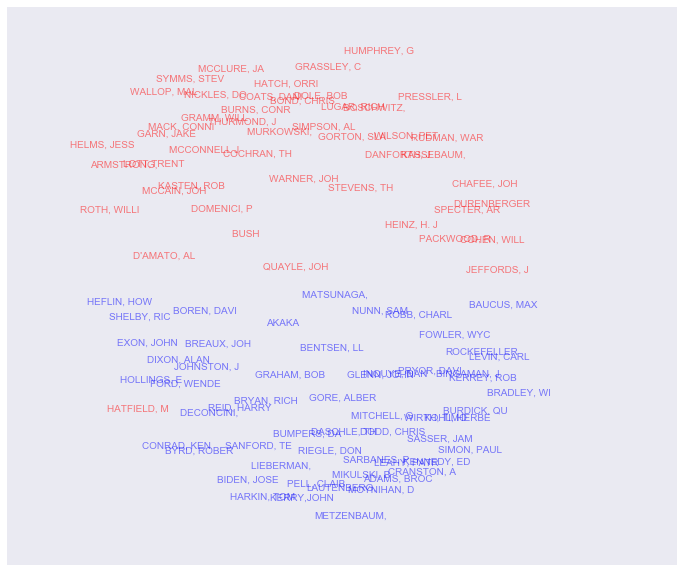

In [127]:
colmap={100:'blue', 200:'red'}
fig = plt.figure(figsize= (12, 10))
for i in range(len(features)):
    name = votes101.name.iloc[i]
    party = votes101.party.iloc[i]
    x = features[i,0]
    y = features[i,1]
    plt.text(x, y, s=name, color=colmap[party], alpha=.5)
    
plt.xlim(features.min()-5, features.max()+15)
plt.ylim(features.min()-5, features.max()+5)
plt.grid('on')
plt.xticks([]); plt.yticks([])
plt.show()

In [ ]:
[col for col in mapped_votes.columns if not col.lower().startswith('v')]

In [133]:
# [0] removes an extra () in the array
names = votes101.name.values

dem = np.where(votes101.party == 100)[0]
rep = np.where(votes101.party == 200)[0] 

votes_columns = [col for col in votes101.columns if col.lower().startswith('v')]

In [128]:
def plot_senate(mds):
    plt.figure(figsize = (12, 10))
    plt.plot(mds[:, 0], mds[:, 1], '.', alpha = 0)
    plt.title('Senators of the 101th Congress')

    for i in dem:
        plt.annotate(names[i], 
                     (mds[i, 0], mds[i, 1]),
                     color = 'blue',
                     alpha = 0.3)

    for j in rep:
        plt.annotate(names[j], 
                     (mds[j, 0], mds[j, 1]),
                     color = 'red',
                     alpha = 0.5)

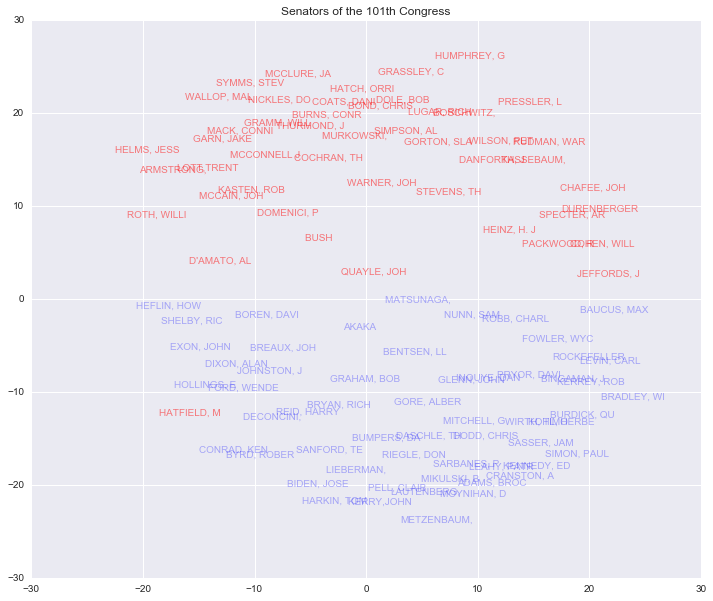

In [129]:
plot_senate(features)

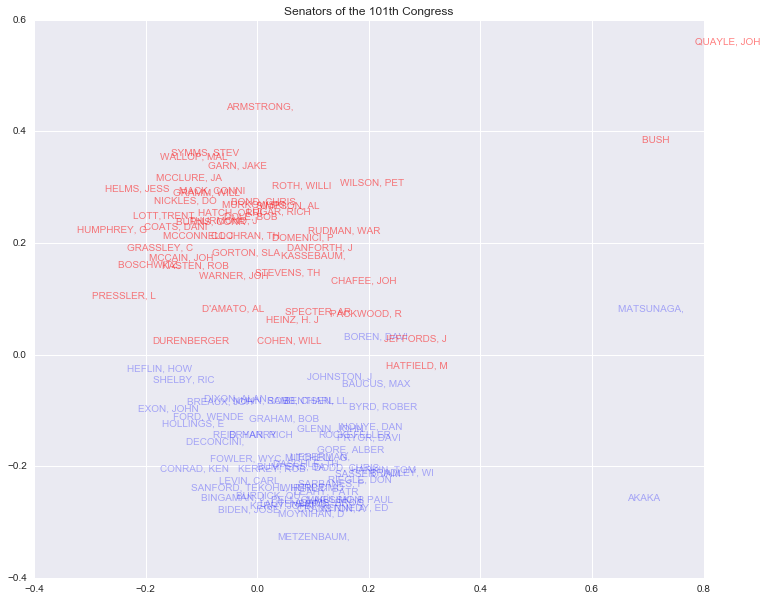

In [135]:
dist = distance.pdist(votes101[votes_columns], metric='jaccard')
mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))
plot_senate(mds)

[None]

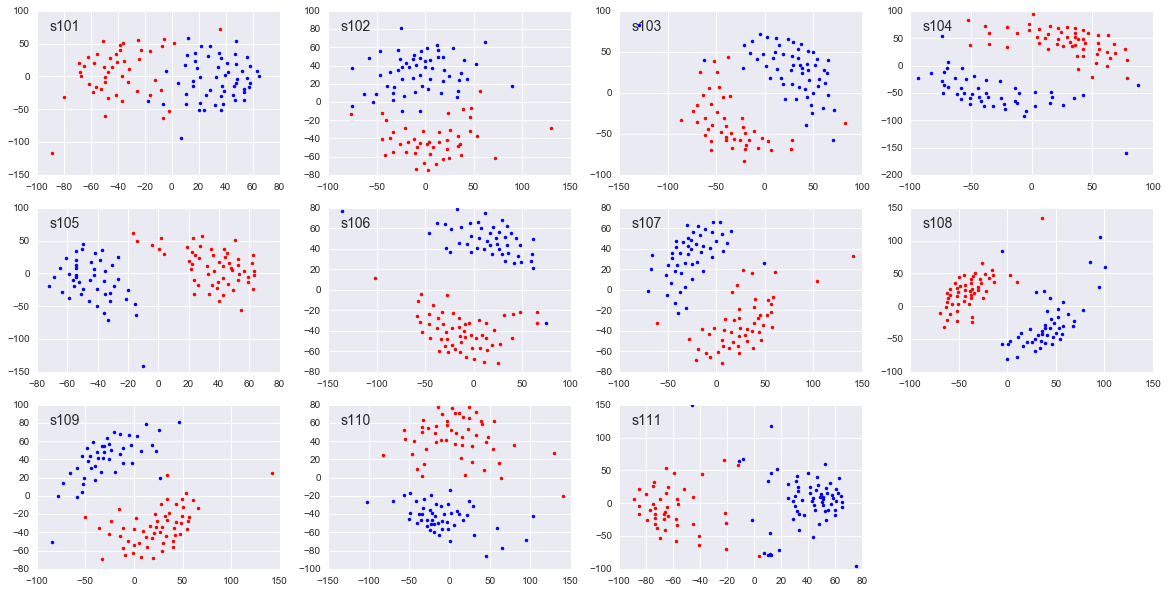

In [172]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 10))
for a, cong in zip(ax.ravel(), sorted(congress.items(), key=lambda x: int(x[0][1:]))):
    sen = cong[1]
    cols = [ c for c in sen.columns if c[0].lower() == 'v'] 
    dist = distance.pdist(sen[cols], metric='euclidean')
    mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

    names = sen.name.values
    dem = np.where(sen.party == 100)[0]
    rep = np.where(sen.party == 200)[0]
    
    a.plot(mds[dem, 0], mds[dem, 1], '.b', mfc = 'blue')
    a.plot(mds[rep, 0], mds[rep, 1], '.b', mfc = 'red')
  
    a.text(0.05, .95, cong[0], transform = a.transAxes, verticalalignment = 'top', fontsize = 14)
    
plt.setp(ax[2, 3], visible = False) 

In [175]:
import plotly
import plotly.plotly as py
import plotly.tools as tls 
from plotly.graph_objs import *

py.iplot_mpl(fig)

In [179]:
fig = tls.get_subplots(
    rows= 4,            # number of rows
    columns= 4,         # number of columns
    horizontal_spacing= 0.02,  # horiz. spacing (norm. coord)
    vertical_spacing= 0.02,    # vert. spacing (norm. coord)
    print_grid=True            # print axis grid ids to screen
)

This is the format of your plot grid!
[13]	[14]	[15]	[16]	
[9]	[10]	[11]	[12]	
[5]	[6]	[7]	[8]	
[1]	[2]	[3]	[4]	



In [182]:
def get_subplots_index(n_rowcol, n_senate):
    
    n_split = n_rowcol**2  # number of subplots      
    n_empty_subplots = n_split - n_senate  # number of empty subplots
    
    _1d = np.arange(1, n_split + 1) # [1, 2, 3, ..., N_split]
    _2d = np.resize(_1d, (n_rowcol, n_rowcol)) # [[1,2,..,n_rowcol], ..[.., n_split]]
    _2d_flip = _2d[::-1, :] # [[..,n_split], ...[1, 2,..n_rowcol]]
    
    split_left = _2d_flip[:, 0] # indices of the left side of the subplots
    split_bottom = _2d_flip[-1,:] # indices of the bottom subplots
    
    _1d_ordered = _2d_flip.flatten().tolist() # [...,n_split,...,1, 2,...n_rowcol]
    splits_empty = range(n_rowcol - n_empty_subplots + 2, n_rowcol + 2) # indices of empty subplots
    
    for split in splits_empty:
        _1d_ordered.remove(split) # removing indices of empty subplots
    splits = _1d_ordered # get the complete list of subplots
    
    return splits, splits_empty, split_left, split_bottom

In [183]:
# Getting the lists of subplot indices
splits, splits_empty, split_left, split_bottom = get_subplots_index(4, 11)

print splits

[13, 14, 15, 16, 9, 10, 11, 12, 6, 7, 8]


In [203]:
dset = enumerate(sorted(congress.items(), key=lambda x: int(x[0][1:])))

In [204]:
traces = []

for i, cn in dset:
    sen = cn[1]
    cols = [ c for c in sen.columns if c.lower().startswith('v')] 
    dist = distance.pdist(sen[cols], metric='euclidean')
    mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

    names = sen.name.values
    dem = np.where(sen.party == 100)[0]
    rep = np.where(sen.party == 200)[0]
    
    names[i], (mds[i, 0], mds[i, 1])
    
    trace1 = Scatter(
        x=mds[rep, 0],
        y=mds[rep, 1],
        text=names[rep],
        mode='markers',
        xaxis='x' + str(i),
        yaxis='y' + str(i),
        marker=Marker(color="red")
        )
    
    trace2 = Scatter(
        x=mds[dem, 0],
        y=mds[dem, 1],
        text=names[dem],
        mode='markers',
        xaxis='x' + str(i),
        yaxis='y' + str(i),
        marker=Marker(color="blue")
        )
    
    traces.append(trace1)
    traces.append(trace2)

layout = Layout(
    xaxis=XAxis(
        domain=[0, 0.45]
    ),
    yaxis=YAxis(
        domain=[0, 0.45]
    ),
    xaxis2=XAxis(
        domain=[0.55, 1]
    ),
    xaxis3=XAxis(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=XAxis(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=YAxis(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=YAxis(
        domain=[0.55, 1]
    ),
    yaxis4=YAxis(
        domain=[0.55, 1],
        anchor='x4'
    )
)

data = Data(traces)
fig = Figure(data=data)

py.iplot(data, filename='Senate Partisanship')
    
    
    



### Multi-dimensional Scaling (MDS)

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

In general, is a technique used for analyzing similarity or dissimilarity data. MDS attempts to model similarity or dissimilarity data as distances in a geometric spaces. The data can be ratings of similarity between objects, interaction frequencies of molecules, or trade indices between countries.

There exists two types of MDS algorithm: metric and non metric. In the scikit-learn, the class MDS implements both. In Metric MDS, the input similarity matrix arises from a metric (and thus respects the triangular inequality), the distances between output two points are then set to be as close as possible to the similarity or dissimilarity data. In the non-metric version, the algorithms will try to preserve the order of the distances, and hence seek for a monotonic relationship between the distances in the embedded space and the similarities/dissimilarities.